# Exploratory Data Analysis on Haberman Dataset

In [ ]:
# Reference for this assignment is taken from the 'Iris dataset EDA' by AAIC
# https://drive.google.com/file/d/1JeuUIw-8V4t0MhBEhS28HmzvgfGFDU8I/view?usp=sharing
# haberman dataset is used for this assignment, which is available on Kaggle
# https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1

# 1. Basic Terminology

__The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.<br>
Reference - https://www.kaggle.com/gilsousa/habermans-survival-data-set__

In [ ]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load haberman data into a pandas dataframe
haberman = pd.read_csv('/content/haberman.csv')

In [ ]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [ ]:
print(haberman.columns)

Index(['age', 'patients', 'nodes', 'status'], dtype='object')


In [ ]:
print(haberman.shape)   # returns length of data points as well as length of features/dimensions of data

(305, 4)


In [ ]:
print(haberman.head())  # returns n rows of data(default 5 rows) with its information

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1


In [ ]:
haberman.columns = ['age','patients','nodes','status']

In [ ]:
haberman['status'].value_counts()  # returns number of data points for each class

,count
status,
1,224
2,81


# Survival status (class attribute) <br>
1 = the patient survived 5 years or longer <br>
2 = the patient died within 5 year <br>

# 2. 2-D Scatter Plot

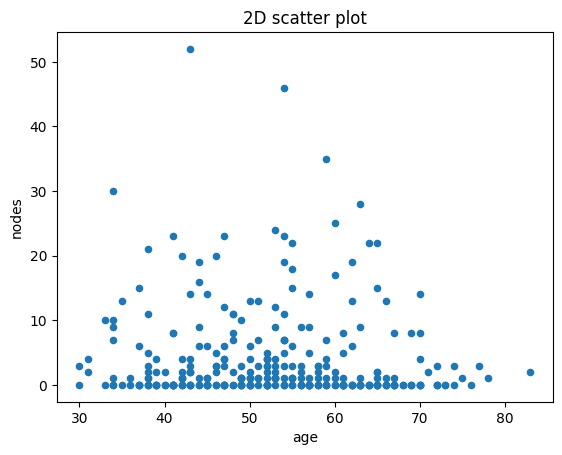

In [ ]:
# 2D Scatter plot -
# we will give 'age' value to X axis and 'nodes' value to Y axis
haberman.plot(kind='scatter', x='age', y='nodes')
plt.title('2D scatter plot')
plt.show()

__Observation__ <br>
1. Majority of the points can be seen below the value of 10 positive axillary nodes distributed over to all the age sections. <br>
2. Lets try color coding the points in consideration the survival and death status.

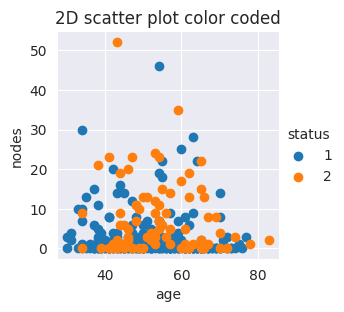

In [ ]:
# 2D scatter plot with color coding for each class
# Reference - https://seaborn.pydata.org/generated/seaborn.set_style.html
sns.set_style("darkgrid")  # setting the style(axes color, grid). can also set whitegrid
sns.FacetGrid(haberman, hue='status') \
   .map(plt.scatter, 'age', 'nodes') \
   .add_legend()  # gives information about the points colors
plt.title('2D scatter plot color coded')
plt.show()

__Observation__ <br>
1. Class 1 and Class 2 points are overlapping. But we can observe few clusters of both classes but they are non-seperable. <br>


# 3. 3D Scatter plot

In [ ]:
# Reference - https://plotly.com/python/3d-scatter-plots/

import plotly.express as px
plot = px.scatter_3d(haberman, x='nodes', y='age', z='patients', color='status') # providing 3 axes, as it is a 3D plot
plot.show()

# Observation
1. This 3D Plots shown between nodes , age and patients axex to represent the relationship.<br>
2. Patients with a higher number of nodes often show poorer survival outcomes (those who did not survive 5 years tend to have more nodes). <br>
3. Higher positive nodes seem correlated with worse outcomes, while fewer nodes are associated with better chances of survival.<br>
4. Some younger patients still fall into the category of non-survivors, while some older patients survive beyond 5 years.<br>

# 4. Pair plots

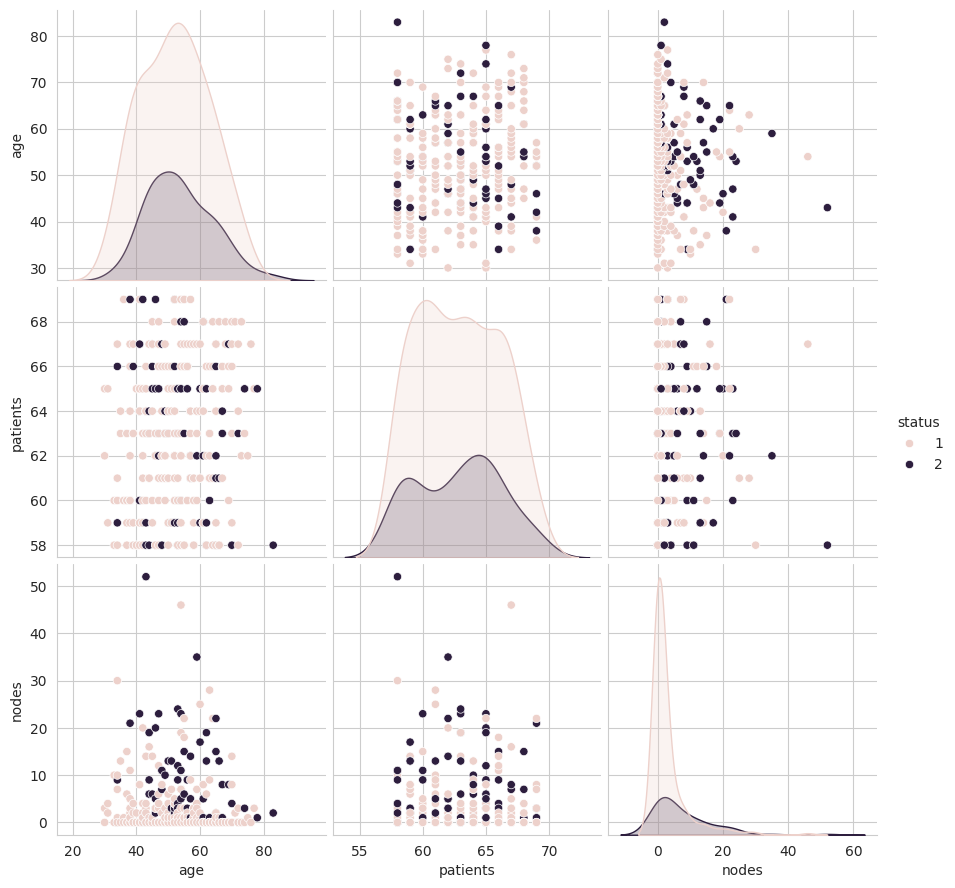

In [ ]:
# Pair plots only show 2D data
# Pair plots plot a pairwise relationships in a dataset


import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppressing warnings and closing any previous plots
warnings.filterwarnings('ignore')
plt.close()

# Setting plot style
sns.set_style('whitegrid')

# Pair plot: visualizing pairwise relationships between age, year, and nodes
sns.pairplot(haberman, hue='status', vars=['age', 'patients', 'nodes'], height=3)  # size -> height in newer versions

# Display the plot
plt.show()


__Observation__
1. The diagonal elements are the PDFs(Probability Density Functions) of the features. <br>
2. Axillary nodes and the age of the patients are the most important features of the dataset which will determine the survival status of the patients.

# 5. Histogram, PDF, CDF

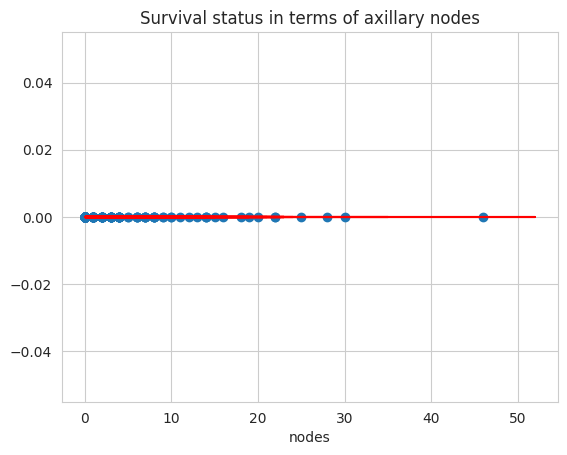

In [ ]:
# 1D Scatter plot (axillary nodes)
class_1 = haberman.loc[haberman['status'] == 1]   # accessing rows of status =1
class_2 = haberman.loc[haberman['status'] == 2]   # accessing rows of status =2

plt.plot(class_1['nodes'], np.zeros_like(class_1['nodes']), 'o')  # representing in 'o' spheres of different colors
plt.plot(class_2['nodes'], np.zeros_like(class_2['nodes']), 'r')
plt.title('Survival status in terms of axillary nodes')
plt.xlabel('nodes')
plt.show()

# Observation
1. There is some overlap between the two classes, particularly around the lower range of axillary nodes. This suggests that some patients with low node counts may not survive, indicating the presence of outliers or other influencing factors (like age or other health conditions) affecting survival.<br>
2. However, as the number of nodes increases, the distinction between the two classes becomes clearer, supporting the idea that a higher number of axillary nodes correlates with a higher risk of not surviving.<br>

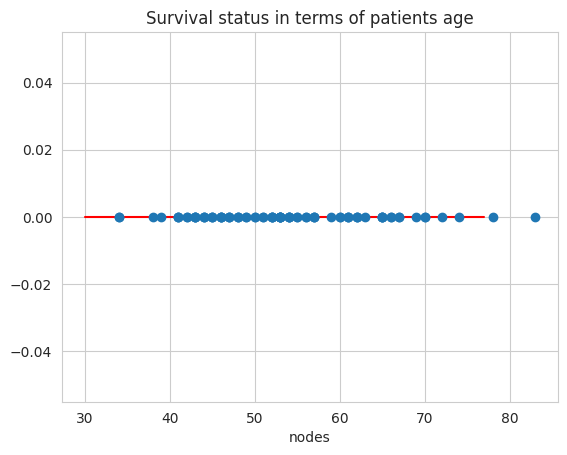

In [ ]:
# 1D Scatter plot (patients' age)
class_1 = haberman.loc[haberman['status'] == 1]  # accessing rows of status =1
class_2 = haberman.loc[haberman['status'] == 2]  # accessing rows of status =2

plt.plot(class_1['age'], np.zeros_like(class_1['age']), 'r')   # representing in 'r' red line for class 1 age
plt.plot(class_2['age'], np.zeros_like(class_2['age']), 'o')   # representing in 'o' spheres of different colors
plt.title('Survival status in terms of patients age')
plt.xlabel('nodes')
plt.show()

__Observation__ <br>
Points of both classes are overlapping a lot. So its very hard to make any sense from the plots of any features provided.

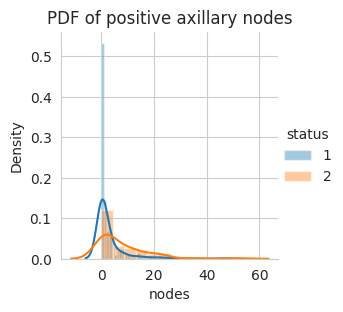

In [ ]:
# PDF analysis on nodes
sns.FacetGrid(haberman, hue='status') \
   .map(sns.distplot, 'nodes') \
   .add_legend()
plt.title('PDF of positive axillary nodes')
plt.show()

__Observation__ <br>
1. If there are no axillary nodes found, patient survives more than 5 years.
2. If there are atmost 4-5 axillary nodes present, then mostly the paient survives.
3. As the number of nodes increases, the chances of the survival of patient decreases.

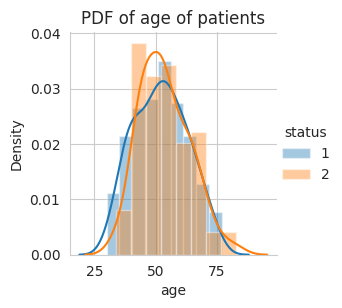

In [ ]:
# PDF analysis on age
sns.FacetGrid(haberman, hue='status') \
   .map(sns.distplot, 'age') \
   .add_legend()
plt.title('PDF of age of patients')
plt.show()

__Observation__ <br>
1. At the early age(30-40), there is less chance of patients dying within 5 years of treament. Their survival rate is pretty much good.
2. Overlapping can be seen in both the distributions of the age data.

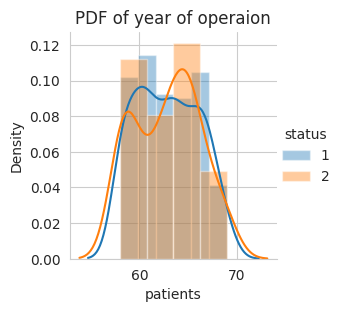

In [ ]:
# PDF analysis on year
sns.FacetGrid(haberman, hue='status') \
   .map(sns.distplot, 'patients') \
   .add_legend()
plt.title('PDF of year of operaion')
plt.show()

__Observation__ <br>
1. Operations done in the year 1960 had highest survival rate of all the years.
2. Operations done in the year 1965 had highest failure rate of all years.
3. These distributions too are overlapping a lot actually.

__Observation on all PDFs of features-__ <br>
The feaure 'nodes' is the most important feature as it has least overlapping compared to the overlappings of other features.

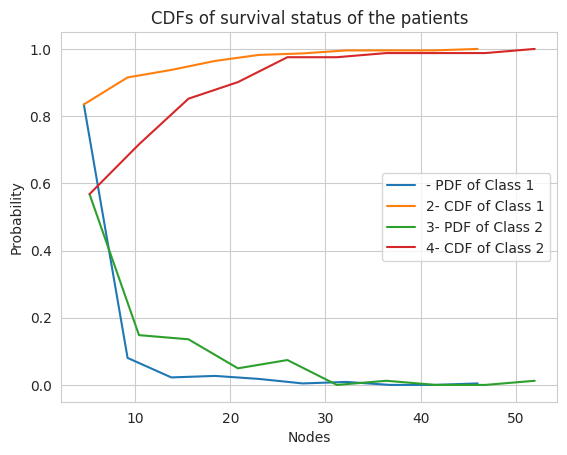

In [ ]:
# CDFs of patients' survival status in consideratio with the number of axillary nodes

# Class 1
# counts - number of points in each bin
# bin_edges - calculated according to the width of the bins (e.g. bin width is 10 then 1......11 are bin edges)
counts, bin_edges = np.histogram(class_1['nodes'], bins=10, density=True)
pdf = counts/(sum(counts))  # number of points divided by the summation of those points is pdf
cdf = np.cumsum(pdf)   # cdf is the cumulative sum of pdf whose max value is 1
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
# Class 2
# counts - number of points in each bin
# bin_edges - calculated according to the width of the bins (e.g. bin width is 10 then 1......11 are bin edges)
counts, bin_edges = np.histogram(class_2['nodes'], bins=10, density=True)
pdf = counts/(sum(counts))  # number of points divided by the summation of those points is pdf
cdf = np.cumsum(pdf)  # cdf is the cumulative sum of pdf whose max value is 1
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['- PDF of Class 1', '2- CDF of Class 1', '3- PDF of Class 2', '4- CDF of Class 2'])
plt.title('CDFs of survival status of the patients')
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.show()

__Observation__ <br>
1. Nearly 85% of people having axillary nodes less than 5 survived more than 5 years after the operation. As the number of nodes increases, survival rate decreases.
2. Nearly 55% op people having axillary nodes less than 5 did not survived so long after the operation.
3. As the number of nodes increases, the operation failure rate also increases but becomes stagnant somewhat after 40 nodes.

# 6. Mean, Variance, Std-dev, Median, Percentile, Quantile, IQR, MAD

Due to the overlapping of the data points of the Class 1 and Class 2, it is pretty hard to separate these classes. <br>
So lets compute the above metrics separately for Class 1 and Class 2

We will compute the metrics for all features but observe the metrics for 'nodes' feature only as it is the most important feature.

In [ ]:
class_1.describe()   # for class 1

,age,patients,nodes,status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [ ]:
class_2.describe()   # for class 2

,age,patients,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


__Observation for 'nodes'__
1. Mean as well as standard deviation of class 1 is less than class 2. It means the mean number of nodes and the spread of the data in number of people for survived people is less compared to dead ones.
2. Median(50%) value of class 1 is 0 and class 2 is 4.  No nodes observed in 50th percentile data of class 1.
3. 75% of data contains 3 nodes only of class 1 whereas there are 11 nodes found in 75% of class 2 data. There is much difference in number of nodes in between both the classes.

In [ ]:
# 90th percentiles
print("\n90th Percentiles:")
print(np.percentile(class_1["nodes"],90))
print(np.percentile(class_2["nodes"],90))

# Median Absolute Deviation (MAD)
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(class_1["nodes"]))
print(robust.mad(class_2["nodes"]))


90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


__Observation__ <br>
90% of data contains 8 nodes only of class 1 whereas there are 20 nodes found in 90% of class 2 data. There is much difference in number of nodes in between both the classes.


# 7. Box plot and Whiskers

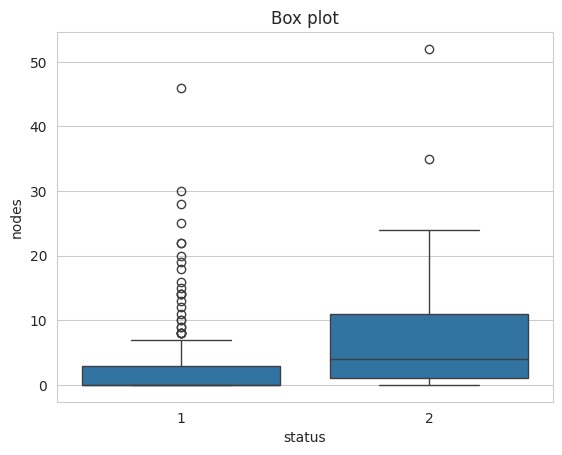

In [ ]:
sns.boxplot(x='status', y='nodes', data=haberman)
plt.title('Box plot')
plt.show()

__Observation__
1. Min value of plots of both the classes is zero(0)
2. Max value of Class 1 is 8 and Class 2 is 25
3. Median axillary nodes for class 1 is 0 whereas for class 2 is 4(median is 50th percentile)
4. There are many outliers in class 1 compared to class 2.
5. 75% of the points of class 1 are overlapping with nearly 50% of the points of class 2.

# 8. Violin plots

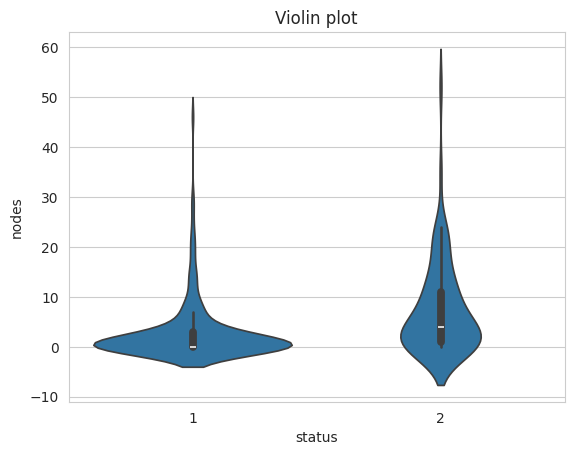

In [ ]:
sns.violinplot(x='status', y='nodes', data=haberman)
plt.title('Violin plot')
plt.show()

__Observation__
1. In class 1 plot, there are huge number of data points who contains no nodes.
2. With the increase in number of nodes the survival rate decreased significantly while few people survived even with more number of nodes.

# 9. Multivariate probability density, contour plot.

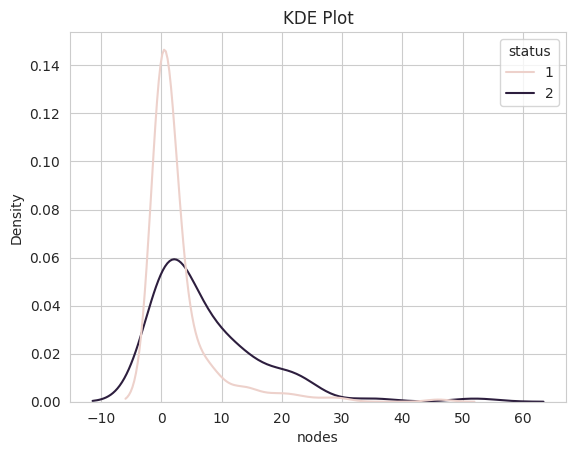

In [ ]:
# KDE is Kernel Density Estimation.
# Reference - https://seaborn.pydata.org/generated/seaborn.kdeplot.html


sns.kdeplot(data=haberman, x='nodes', hue='status', common_norm=False)
plt.title('KDE Plot')
plt.show()

__Observation__
1. The class 1 plot is immensely densed at zero nodes which means most of the people survived more than 5 years with 0-3 nodes atmost.
2. Class 2 plot is less densed than class 1 plot as the data is imbalanced.

# Conclusion :

1. From the data analysis done above, I conclude that the given dataset is not linearly separable.
2. The dataset is imbalanced in nature (Class 1 datapoints is higher than Class 2 datapoints).
3. The most important feature obtained is the number of nodes for the survival of the patients.
4. The features 'age' and 'years' do not provide any value in determining the survival status of the patient though 'age' feature was slightly better. These features may come handy if more data is provided.